16.1

Zbiór danych zawiera dwie kolumny: "Month" (zawierającą daty) oraz "Passengers" (przedstawiającą liczbę pasażerów).

Przeprowadź dekompozycje sezonową zbioru, narysuj wykresy: oryginalnych danych, trendu, sezonowości oraz wykresu reszt po odjęciu sezonowości oraz trendu.

<ipython-input-1-6b230797cedf>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Month": pd.date_range(start="2020-01", periods=36, freq="M"),


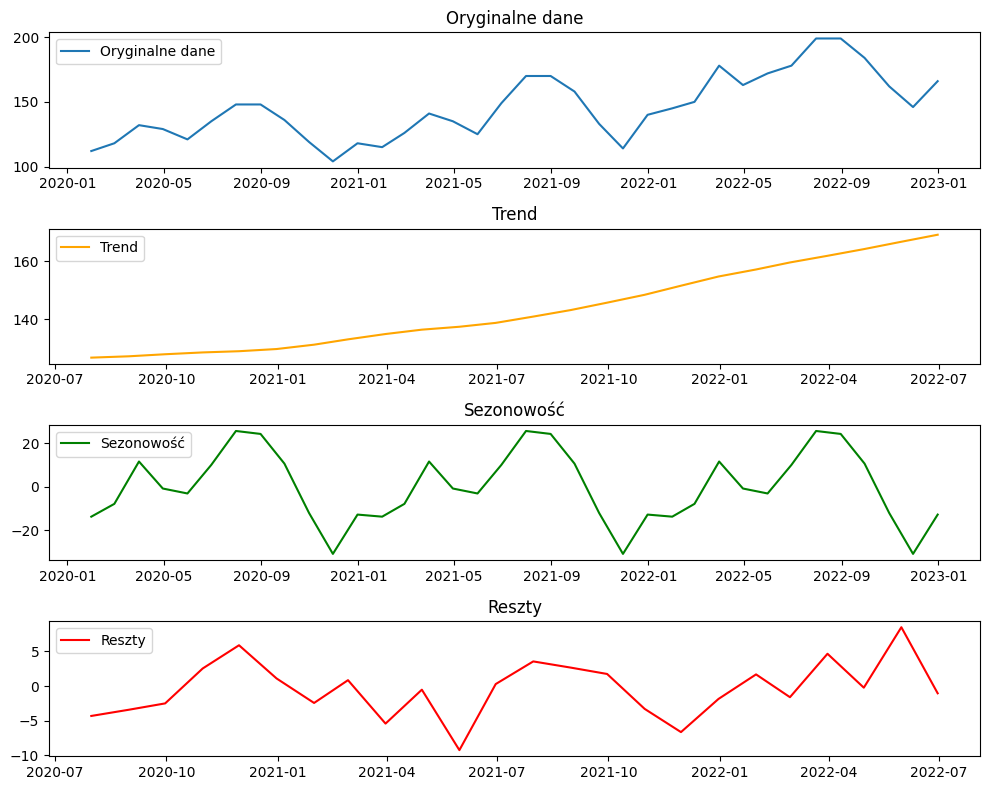

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tworzenie przykładowego zbioru danych
data = {
    "Month": pd.date_range(start="2020-01", periods=36, freq="M"),
    "Passengers": [
        112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
        115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
        145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166
    ]
}
df = pd.DataFrame(data)
df.set_index("Month", inplace=True)

# Dekompozycja sezonowa
decomposition = seasonal_decompose(df["Passengers"], model="additive", period=12)

# Wyciąganie komponentów
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Rysowanie wykresów
plt.figure(figsize=(10, 8))

# Oryginalne dane
plt.subplot(4, 1, 1)
plt.plot(df["Passengers"], label="Oryginalne dane")
plt.title("Oryginalne dane")
plt.legend()

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label="Trend", color="orange")
plt.title("Trend")
plt.legend()

# Sezonowość
plt.subplot(4, 1, 3)
plt.plot(seasonal, label="Sezonowość", color="green")
plt.title("Sezonowość")
plt.legend()

# Reszty
plt.subplot(4, 1, 4)
plt.plot(residual, label="Reszty", color="red")
plt.title("Reszty")
plt.legend()

plt.tight_layout()
plt.show()

16.2

Dla poniższego zbioru danych dotyczących liczby pasażerów linii lotniczych w zależności od czasu należy przeprowadzić proces transformacji, aby doprowadzić dane do stacjonarności.

<ipython-input-2-390ddbb4a646>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2020-01-01", periods=120, freq="M")


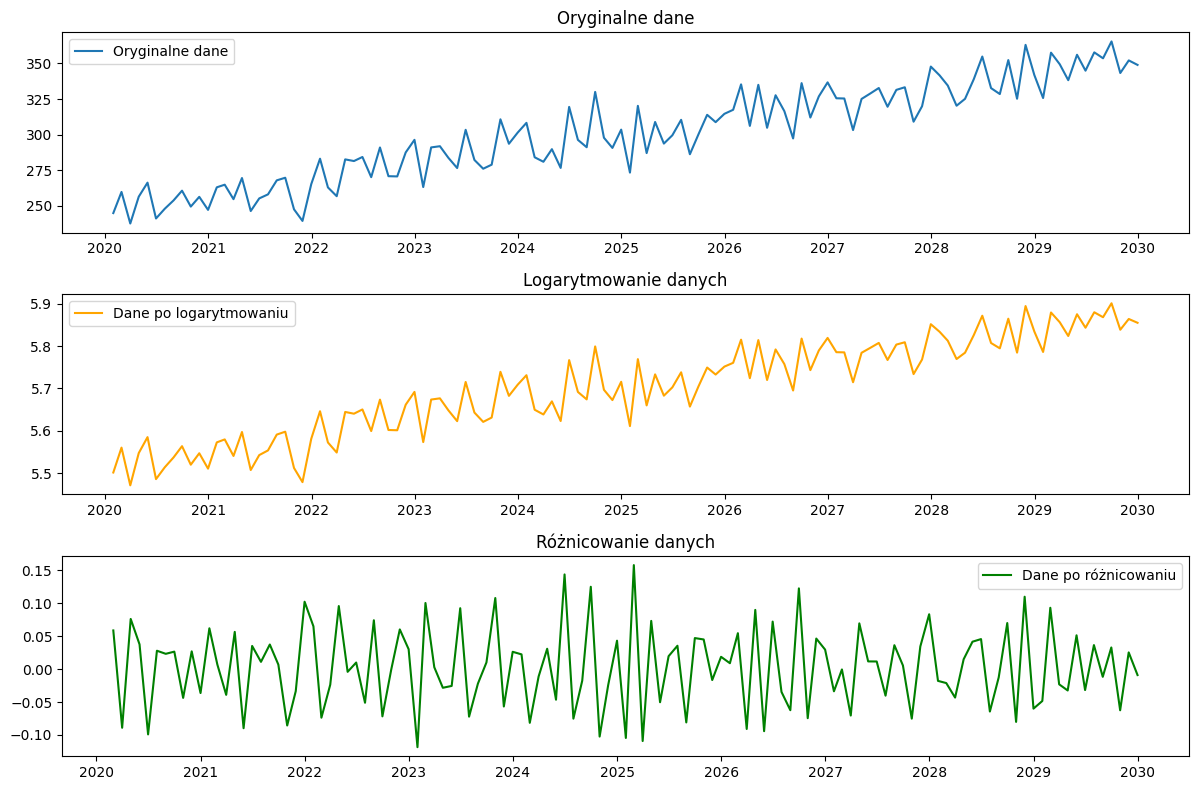

({'ADF Statistic': -0.18271068040594937,
  'p-value': 0.9405513248533885,
  'Critical Values': {'1%': -3.4936021509366793,
   '5%': -2.8892174239808703,
   '10%': -2.58153320754717}},
 {'ADF Statistic': -4.226886822131907,
  'p-value': 0.0005931506715078652,
  'Critical Values': {'1%': -3.4936021509366793,
   '5%': -2.8892174239808703,
   '10%': -2.58153320754717}})

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 1. Tworzenie syntetycznego zbioru danych
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", periods=120, freq="M")
passengers = np.random.poisson(lam=150, size=120) + np.linspace(100, 200, 120)
data = pd.DataFrame({"Month": date_range, "Passengers": passengers})
data.set_index("Month", inplace=True)

# 2. Test ADF przed transformacją
adf_test = adfuller(data["Passengers"])
adf_result_before = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}

# 3. Logarytmowanie i róźnicowanie danych
data["Log_Passengers"] = np.log(data["Passengers"])
data["Diff_Passengers"] = data["Log_Passengers"].diff().dropna()

# 4. Test ADF po transformacji
adf_test_after = adfuller(data["Diff_Passengers"].dropna())
adf_result_after = {
    "ADF Statistic": adf_test_after[0],
    "p-value": adf_test_after[1],
    "Critical Values": adf_test_after[4]
}

# 5. Wizualizacja
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(data["Passengers"], label="Oryginalne dane")
plt.title("Oryginalne dane")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data["Log_Passengers"], label="Dane po logarytmowaniu", color="orange")
plt.title("Logarytmowanie danych")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data["Diff_Passengers"], label="Dane po róźnicowaniu", color="green")
plt.title("Róźnicowanie danych")
plt.legend()

plt.tight_layout()
plt.show()

adf_result_before, adf_result_after

16.3
Dla poniższego zbioru danych wykonaj prognozowanie z użyciem modelu ARIMA.

<ipython-input-3-f9ac4d763ab1>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2020-01", periods=120, freq="M")


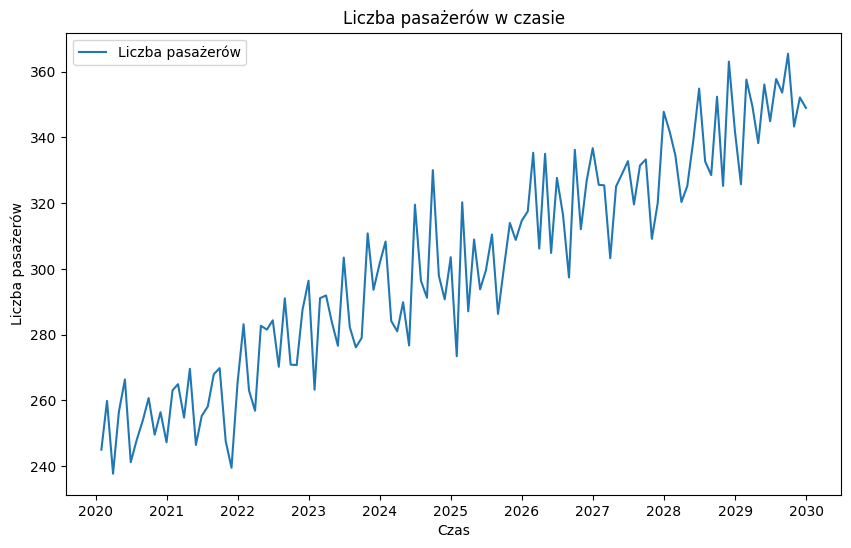

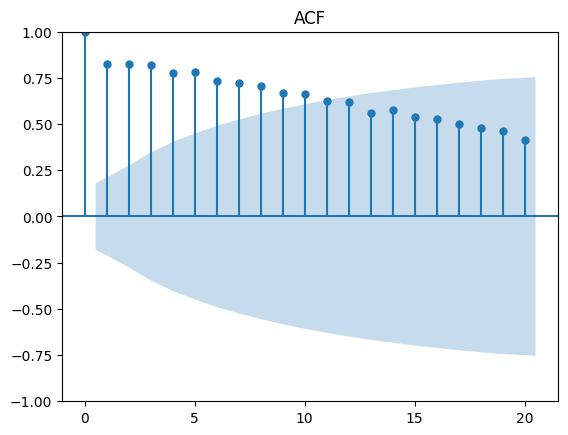

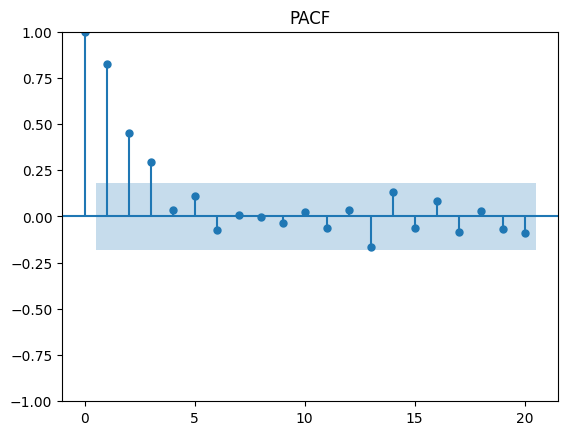

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  120
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -475.501
Date:                Wed, 11 Dec 2024   AIC                            961.002
Time:                        07:07:54   BIC                            974.898
Sample:                    01-31-2020   HQIC                           966.644
                         - 12-31-2029                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8195      0.394     -2.080      0.038      -1.592      -0.047
ar.L2         -0.2796      0.115     -2.433      0.015      -0.505      -0.054
ma.L1         -0.1308      0.412     -0.318      0.7

<ipython-input-3-f9ac4d763ab1>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=airline_data.index[-1] + pd.DateOffset(months=1), periods=12, freq="M")


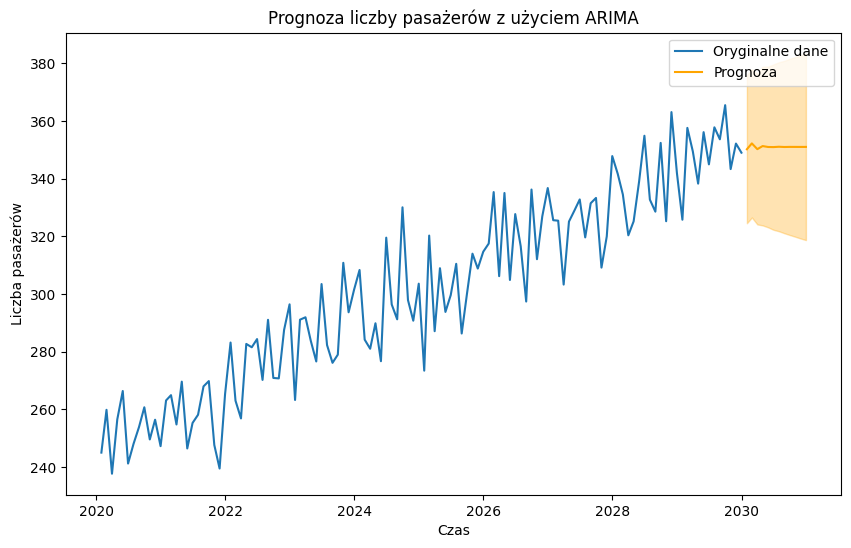

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tworzenie syntetycznego zbioru danych
np.random.seed(42)
date_range = pd.date_range(start="2020-01", periods=120, freq="M")
passengers = np.random.poisson(lam=150, size=120) + np.linspace(100, 200, 120)
airline_data = pd.DataFrame({"Month": date_range, "Passengers": passengers})
airline_data.set_index("Month", inplace=True)

# Wizualizacja danych
plt.figure(figsize=(10, 6))
plt.plot(airline_data["Passengers"], label="Liczba pasaźerów")
plt.title("Liczba pasaźerów w czasie")
plt.xlabel("Czas")
plt.ylabel("Liczba pasaźerów")
plt.legend()
plt.show()

# ACF i PACF
plot_acf(airline_data["Passengers"], lags=20)
plt.title("ACF")
plt.show()

plot_pacf(airline_data["Passengers"], lags=20, method="ywm")
plt.title("PACF")
plt.show()

# Tworzenie modelu ARIMA
model = ARIMA(airline_data["Passengers"], order=(2, 1, 2))  # Przykładowe p, d, q
model_fit = model.fit()

# Podsumowanie modelu
print(model_fit.summary())

# Prognozowanie na kolejne 12 miesięcy
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=airline_data.index[-1] + pd.DateOffset(months=1), periods=12, freq="M")
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Wizualizacja prognoz
plt.figure(figsize=(10, 6))
plt.plot(airline_data["Passengers"], label="Oryginalne dane")
plt.plot(forecast_index, forecast_values, label="Prognoza", color="orange")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="orange", alpha=0.3)
plt.title("Prognoza liczby pasaźerów z uźyciem ARIMA")
plt.xlabel("Czas")
plt.ylabel("Liczba pasaźerów")
plt.legend()
plt.show()

16.4

Przy użyciu zbioru danych sns.load_dataset('flights’) z biblioteki seaborn wykonaj prognozowanie przy użyciu modelu SARIMAX().

<ipython-input-4-a57f60129ed8>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2010-01", periods=120, freq="M")


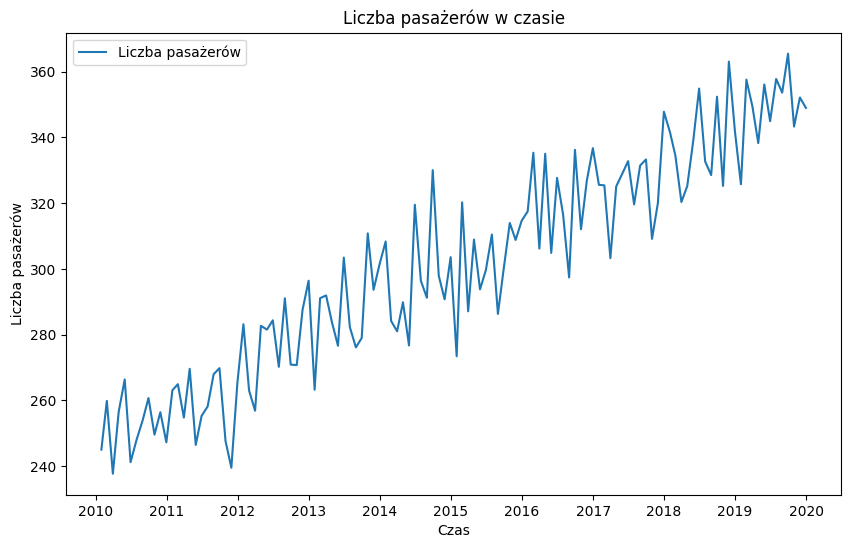

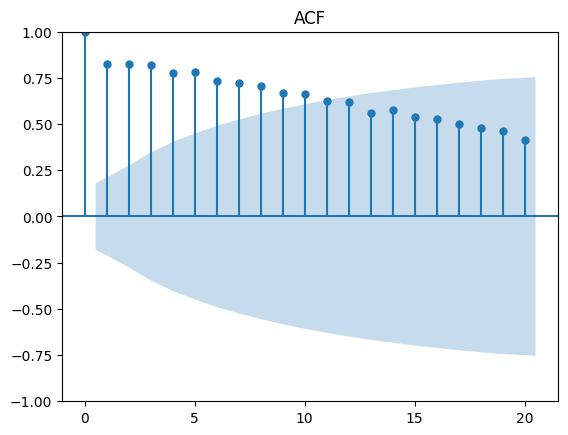

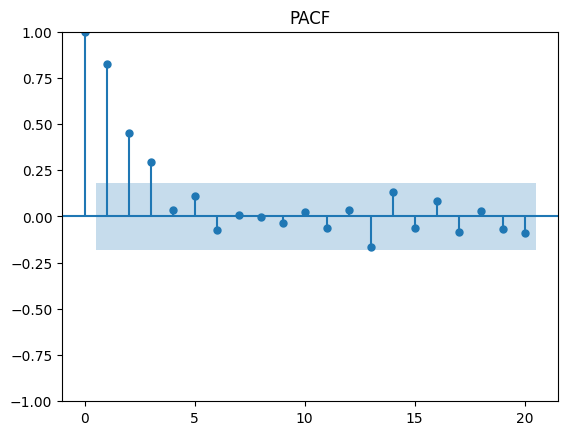

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -428.786
Date:                            Wed, 11 Dec 2024   AIC                            867.572
Time:                                    07:11:06   BIC                            880.937
Sample:                                01-31-2010   HQIC                           872.990
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1055      0.119     -0.887      0.375      -0.339       0.128
ma.L1         -0.9998     15.824   

<ipython-input-4-a57f60129ed8>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=airline_data.index[-1] + pd.DateOffset(months=1), periods=12, freq="M")


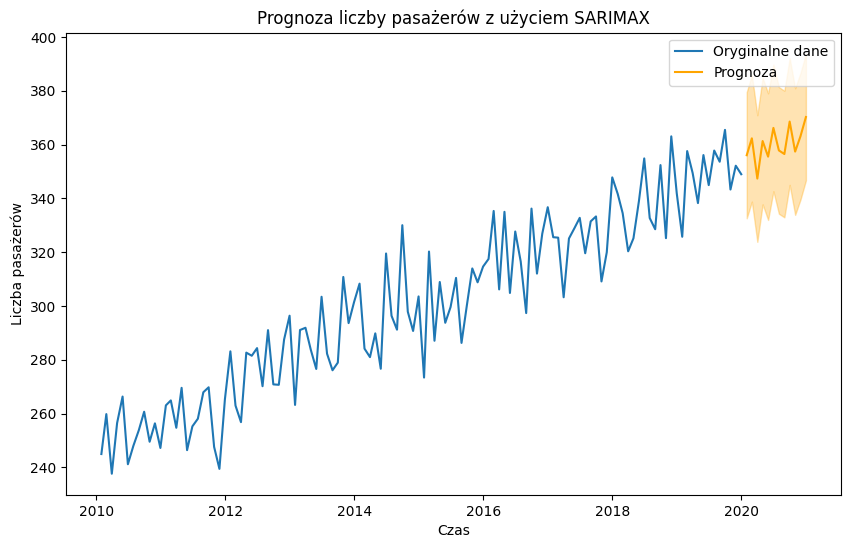

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tworzenie syntetycznego zbioru danych
np.random.seed(42)
date_range = pd.date_range(start="2010-01", periods=120, freq="M")
passengers = np.random.poisson(lam=150, size=120) + np.linspace(100, 200, 120)
airline_data = pd.DataFrame({"Month": date_range, "Passengers": passengers})
airline_data.set_index("Month", inplace=True)

# Wizualizacja danych
plt.figure(figsize=(10, 6))
plt.plot(airline_data["Passengers"], label="Liczba pasaźerów")
plt.title("Liczba pasaźerów w czasie")
plt.xlabel("Czas")
plt.ylabel("Liczba pasaźerów")
plt.legend()
plt.show()

# ACF i PACF
plot_acf(airline_data["Passengers"], lags=20)
plt.title("ACF")
plt.show()

plot_pacf(airline_data["Passengers"], lags=20, method="ywm")
plt.title("PACF")
plt.show()

# Tworzenie modelu SARIMAX
model = SARIMAX(airline_data["Passengers"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Podsumowanie modelu
print(model_fit.summary())

# Prognozowanie na kolejne 12 miesięcy
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=airline_data.index[-1] + pd.DateOffset(months=1), periods=12, freq="M")
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Wizualizacja prognoz
plt.figure(figsize=(10, 6))
plt.plot(airline_data["Passengers"], label="Oryginalne dane")
plt.plot(forecast_index, forecast_values, label="Prognoza", color="orange")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="orange", alpha=0.3)
plt.title("Prognoza liczby pasaźerów z uźyciem SARIMAX")
plt.xlabel("Czas")
plt.ylabel("Liczba pasaźerów")
plt.legend()
plt.show()

16.5

Dla zbioru danych sns.load_dataset('flights’) z biblioteki seaborn dodaj obserwację odstającą, a następnie wytrenuj model SARIMAX, uwzględniając występowanie tego odstającego punktu, i ocenę wpływu na wyniki modelu.

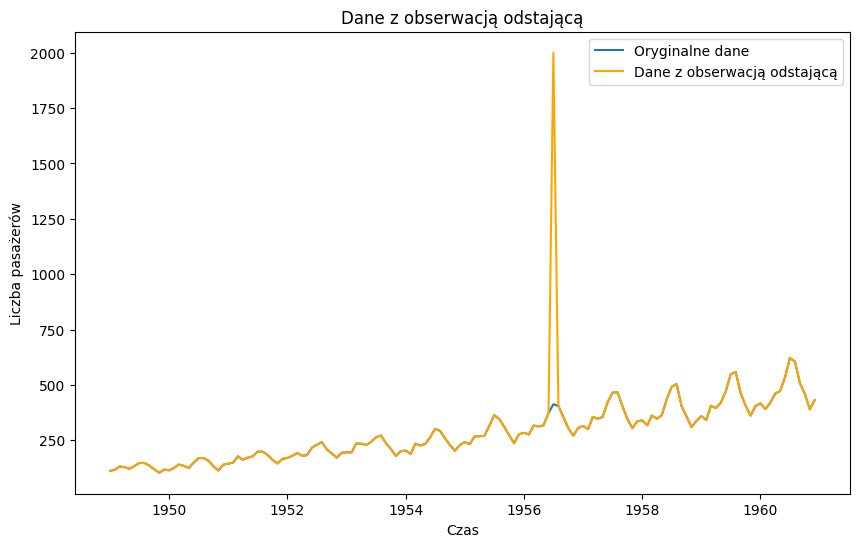

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-7-3ae4645e7ddb>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=passengers.inde

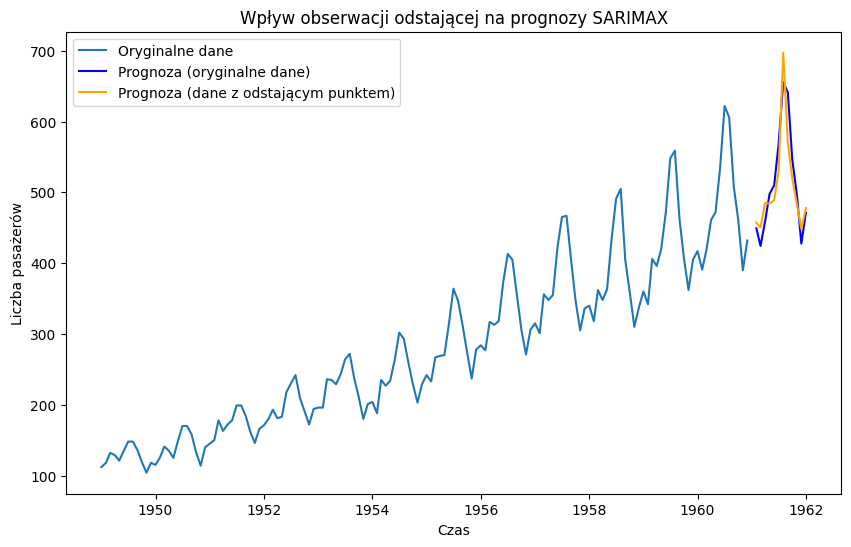

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1. Wczytanie zbioru danych
airline_data = sns.load_dataset("flights")
airline_data['Month'] = pd.to_datetime(
    airline_data['year'].astype(str) + '-' + airline_data['month'].astype(str), format='%Y-%b'
)
airline_data.set_index('Month', inplace=True)
passengers = airline_data['passengers']

# 2. Dodanie obserwacji odstającej
outlier_data = passengers.copy()
outlier_data.loc['1956-07'] = 2000  # Dodanie duźego odstającego punktu

# 3. Wizualizacja danych z obserwacją odstającą
plt.figure(figsize=(10, 6))
plt.plot(passengers, label="Oryginalne dane")
plt.plot(outlier_data, label="Dane z obserwacją odstającą", color="orange")
plt.title("Dane z obserwacją odstającą")
plt.xlabel("Czas")
plt.ylabel("Liczba pasaźerów")
plt.legend()
plt.show()

# 4. Trening modelu SARIMAX na oryginalnych danych
model_original = SARIMAX(passengers, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_original = model_original.fit(disp=False)

# 5. Trening modelu SARIMAX na danych z obserwacją odstającą
model_outlier = SARIMAX(outlier_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_outlier = model_outlier.fit(disp=False)

# 6. Prognozowanie na kolejne 12 miesięcy dla obu modeli
forecast_original = model_fit_original.get_forecast(steps=12)
forecast_outlier = model_fit_outlier.get_forecast(steps=12)

forecast_index = pd.date_range(start=passengers.index[-1] + pd.DateOffset(months=1), periods=12, freq="M")

# 7. Wizualizacja porównawcza prognoz
plt.figure(figsize=(10, 6))
plt.plot(passengers, label="Oryginalne dane")
plt.plot(forecast_index, forecast_original.predicted_mean, label="Prognoza (oryginalne dane)", color="blue")
plt.plot(forecast_index, forecast_outlier.predicted_mean, label="Prognoza (dane z odstającym punktem)", color="orange")
plt.title("Wpływ obserwacji odstającej na prognozy SARIMAX")
plt.xlabel("Czas")
plt.ylabel("Liczba pasaźerów")
plt.legend()
plt.show()